                                            ## WEEK 5: FRIDAY LAB 04
 

This week, you will determine which of the variables in your team dataset depend on other variables; that is, which independent variables can be used to predict values for the dependent variable most effectively.

Complete the analyses below in a .ipynb file and answer the following questions in markdown (.ipnyb) (1 point each):
1. Select one dependent variable in the dataset. This will be your target variable for the remainder of this lab. Explain how and why you have selected that particular target variable in no less than 3 sentences.

2. Determine what correlations there are among independent variables (= predictors) in the dataset by setting up a correlation table.  Explain in at least 2 sentences what correlations your analysis is showing and if any predictor variables appear to be correlated to one another

3. Determine which independent variable in the dataset is the most important overall predictor for your chosen dependent (target) variable, then build a simple linear regression based on this predictor and evaluate the quality of your model. Explain why (or why not) it is acceptable to use this model to predict future values of your dependent variable.

4. Run a basic multiple regression and review the p-values for each variable. If any variables have p-values > 0.05, remove them because they are not statistically significant. Rerun the multiple regression until you can see which of the variables in your dataset should be combined to produce an optimal model. Then build and run your multiple regression model and test its quality. Explain how this model improves the output of the simple linear regression you ran previously.

5. Transform your dependent variable from question 1 into a binary shape. Build and run a logistic regression model and explain in AT LEAST two sentences how your output improves on the simple and multiple regression. Is the logistic model better or not as good?

In [62]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import spatial
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Reading in the IPL dataframe
Match = pd.read_csv('Indian Premium Leaque\Match.csv')

#Verifying that we can see the data
Match

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country
0,335987,18-Apr-08,2,1,1,M Chinnaswamy Stadium,2,field,0,1,0,by runs,140.0,1.0,2.0,470,477,Bangalore,India
1,335988,19-Apr-08,4,3,1,"Punjab Cricket Association Stadium, Mohali",3,bat,0,1,0,by runs,33.0,3.0,19.0,471,487,Chandigarh,India
2,335989,19-Apr-08,6,5,1,Feroz Shah Kotla,5,bat,0,1,0,by wickets,9.0,6.0,90.0,472,512,Delhi,India
3,335990,20-Apr-08,7,2,1,Wankhede Stadium,7,bat,0,1,0,by wickets,5.0,2.0,11.0,473,476,Mumbai,India
4,335991,20-Apr-08,1,8,1,Eden Gardens,8,bat,0,1,0,by wickets,5.0,1.0,4.0,474,486,Kolkata,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,981016,22-May-16,6,2,9,Shaheed Veer Narayan Singh International Stadium,2,field,0,1,0,by wickets,6.0,2.0,8.0,511,497,Raipur,India
573,981018,24-May-16,13,2,9,M Chinnaswamy Stadium,2,field,0,1,0,by wickets,4.0,2.0,110.0,495,482,Bangalore,India
574,981020,25-May-16,11,1,9,Feroz Shah Kotla,1,field,0,1,0,by runs,22.0,11.0,163.0,481,499,Delhi,India
575,981022,27-May-16,13,11,9,Feroz Shah Kotla,11,field,0,1,0,by wickets,4.0,11.0,187.0,481,498,Delhi,India


In [63]:
Match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Match_Id             577 non-null    int64  
 1   Match_Date           577 non-null    object 
 2   Team_Name_Id         577 non-null    int64  
 3   Opponent_Team_Id     577 non-null    int64  
 4   Season_Id            577 non-null    int64  
 5   Venue_Name           577 non-null    object 
 6   Toss_Winner_Id       577 non-null    int64  
 7   Toss_Decision        577 non-null    object 
 8   IS_Superover         577 non-null    int64  
 9   IS_Result            577 non-null    int64  
 10  Is_DuckWorthLewis    577 non-null    int64  
 11  Win_Type             577 non-null    object 
 12  Won_By               568 non-null    float64
 13  Match_Winner_Id      574 non-null    float64
 14  Man_Of_The_Match_Id  574 non-null    float64
 15  First_Umpire_Id      577 non-null    int

1. Select one dependent variable in the dataset. This will be your target variable for the remainder of this lab. Explain how and why you have selected that particular target variable in no less than 3 sentences.


The selected Dependent variable in the dataset is the Win Type. It represents the winning type of every match used in the IPL dataset. It's prediction could give players an edge on what to focus on during the match as it becomes the matches decision factor.

2. Determine what correlations there are among independent variables (= predictors) in the dataset by setting up a correlation table.  Explain in at least 2 sentences what correlations your analysis is showing and if any predictor variables appear to be correlated to one another



In [3]:
corr = Match.corr()
corr

,Match_Id,Team_Name_Id,Opponent_Team_Id,Season_Id,Toss_Winner_Id,IS_Superover,IS_Result,Is_DuckWorthLewis,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id
Match_Id,1.000000,0.197904,0.143823,0.973199,0.154285,0.001446,-0.047405,0.044152,-0.027350,0.183065,0.345156,0.631265,0.244076
Team_Name_Id,0.197904,1.000000,-0.071301,0.187245,0.401367,-0.042507,0.041791,0.033693,-0.081700,0.500685,0.114603,0.115508,0.040782
Opponent_Team_Id,0.143823,-0.071301,1.000000,0.131217,0.521171,-0.029784,-0.042784,-0.025845,0.027771,0.415307,0.075354,0.066026,0.039768
Season_Id,0.973199,0.187245,0.131217,1.000000,0.132453,0.012539,-0.047647,0.015600,-0.016961,0.160728,0.361897,0.605845,0.250250
Toss_Winner_Id,0.154285,0.401367,0.521171,0.132453,1.000000,-0.080018,0.020550,0.058076,0.017411,0.432264,0.100083,0.094334,0.081526
IS_Superover,0.001446,-0.042507,-0.029784,0.012539,-0.080018,1.000000,0.007411,-0.016747,NaN,0.006003,0.026791,-0.029688,-0.062198
IS_Result,-0.047405,0.041791,-0.042784,-0.047647,0.020550,0.007411,1.000000,0.011811,NaN,NaN,NaN,-0.019603,-0.114275
Is_DuckWorthLewis,0.044152,0.033693,-0.025845,0.015600,0.058076,-0.016747,0.011811,1.000000,-0.012167,0.018661,-0.066318,0.079925,0.048232
Won_By,-0.027350,-0.081700,0.027771,-0.016961,0.017411,NaN,NaN,-0.012167,1.000000,-0.080679,-0.075842,-0.005873,0.017980
Match_Winner_Id,0.183065,0.500685,0.415307,0.160728,0.432264,0.006003,NaN,0.018661,-0.080679,1.000000,0.193620,0.070119,0.053850


The correlations in the study show a high variation of positive and negative correlation in the correlation table. First_Umpire_Id has a moderate positive correlation to the Match_id.

3. Determine which independent variable in the dataset is the most important overall predictor for your chosen dependent (target) variable, then build a simple linear regression based on this predictor and evaluate the quality of your model. Explain why (or why not) it is acceptable to use this model to predict future values of your dependent variable.



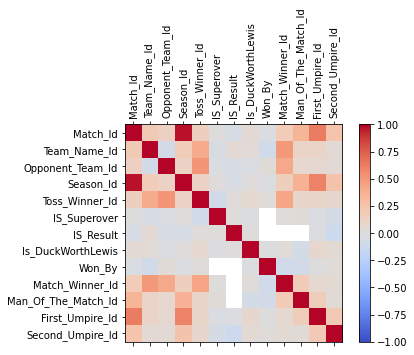

In [4]:
# Now we can make a pretty correlation heatmap with pyplot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

The most important variable to the Win_type is the Won_By which shows how different win types yield within a match.

In [65]:
# Simple linear Regression
Match = Match[Match['Won_By'].notna()]
Match['Win_Type'] = pd.factorize(Match['Win_Type'])[0]
X = Match['Won_By']
y = Match['Win_Type']
X = sm.add_constant(X)
Match.mod1 = sm.OLS(y, X).fit()  ## sm.OLS(output, i.e. dependent variable, input, i.e. independent variable)
Match.mod1_summary = Match.mod1.summary()
print(Match.mod1_summary)

                            OLS Regression Results                            
Dep. Variable:               Win_Type   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     240.9
Date:                Fri, 11 Feb 2022   Prob (F-statistic):           1.59e-45
Time:                        16:43:29   Log-Likelihood:                -309.67
No. Observations:                 568   AIC:                             623.3
Df Residuals:                     566   BIC:                             632.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7563      0.022     33.785      0.0

<ipython-input-65-05c8f9565d5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Match['Win_Type'] = pd.factorize(Match['Win_Type'])[0]


The p-value is 0.000 which shows that both chosen variables are dependant.  It is not acceptable to use this model to predict future values of Win_Type, because R squared is at 29.9%.

4. Run a basic multiple regression and review the p-values for each variable. If any variables have p-values > 0.05, remove them because they are not statistically significant. Rerun the multiple regression until you can see which of the variables in your dataset should be combined to produce an optimal model. Then build and run your multiple regression model and test its quality. Explain how this model improves the output of the simple linear regression you ran previously.



In [16]:
Match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568 entries, 0 to 576
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Match_Id             568 non-null    int64  
 1   Match_Date           568 non-null    int32  
 2   Team_Name_Id         568 non-null    int64  
 3   Opponent_Team_Id     568 non-null    int64  
 4   Season_Id            568 non-null    int64  
 5   Venue_Name           568 non-null    int32  
 6   Toss_Winner_Id       568 non-null    int64  
 7   Toss_Decision        568 non-null    int32  
 8   IS_Superover         568 non-null    int64  
 9   IS_Result            568 non-null    int64  
 10  Is_DuckWorthLewis    568 non-null    int64  
 11  Win_Type             568 non-null    int32  
 12  Won_By               568 non-null    float64
 13  Match_Winner_Id      568 non-null    float64
 14  Man_Of_The_Match_Id  568 non-null    float64
 15  First_Umpire_Id      568 non-null    int

In [66]:
# storing only the factor levels array inplace of the object utilizing pandas factorize to utilize all the dataset variables 

Match['Match_Date'] = pd.factorize(Match['Match_Date'])[0]
Match['Venue_Name'] = pd.factorize(Match['Venue_Name'])[0]
Match['Toss_Decision'] = pd.factorize(Match['Toss_Decision'])[0]
Match['City_Name'] = pd.factorize(Match['City_Name'])[0]
Match['Host_Country'] = pd.factorize(Match['Host_Country'])[0]
Match.dtypes

<ipython-input-66-6a92822e3520>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Match['Match_Date'] = pd.factorize(Match['Match_Date'])[0]
<ipython-input-66-6a92822e3520>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Match['Venue_Name'] = pd.factorize(Match['Venue_Name'])[0]
<ipython-input-66-6a92822e3520>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

Match_Id                 int64
Match_Date               int32
Team_Name_Id             int64
Opponent_Team_Id         int64
Season_Id                int64
Venue_Name               int32
Toss_Winner_Id           int64
Toss_Decision            int32
IS_Superover             int64
IS_Result                int64
Is_DuckWorthLewis        int64
Win_Type                 int32
Won_By                 float64
Match_Winner_Id        float64
Man_Of_The_Match_Id    float64
First_Umpire_Id          int64
Second_Umpire_Id         int64
City_Name                int32
Host_Country             int32
dtype: object

In [67]:
# multiple regression
X = Match.iloc[:, :-1].values
y = Match.iloc[:, 18].values

X = np.append(arr = np.ones((568, 1)).astype(int), values = X, axis = 1) # We are building our numpy array

X_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]] # Now we combine all 16 input variables into our first iteration
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit() # Now we set up our regressor function with OLS again as before.
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     15.44
Date:                Fri, 11 Feb 2022   Prob (F-statistic):           3.67e-35
Time:                        16:43:57   Log-Likelihood:                -250.70
No. Observations:                 568   AIC:                             535.4
Df Residuals:                     551   BIC:                             609.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7025      0.546      3.119      0.0

In [68]:
# Removing where p-values > 0.05
X_opt = X[:, [0, 1, 2, 3, 9, 10, 16, 18]] # variables having p-values > 0.05 have been removed
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit() # Now we set up our regressor function with OLS again as before.
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     48.53
Date:                Fri, 11 Feb 2022   Prob (F-statistic):           9.42e-42
Time:                        16:44:07   Log-Likelihood:                -253.96
No. Observations:                 568   AIC:                             519.9
Df Residuals:                     562   BIC:                             546.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3027      0.449      2.899      0.0

In [22]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size = 0.2, random_state = 0) 

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print('Model accuracy score:', round(regressor.score(X_train,y_train)*100,2))

Model accuracy score: 31.67


The accuracy score improved from 29.9 % to 31.67% with using mutiple regression. This improves the quality of the simple linear regression by improving the accuracy score

5. Transform your dependent variable from question 1 into a binary shape. Build and run a logistic regression model and explain in AT LEAST two sentences how your output improves on the simple and multiple regression. Is the logistic model better or not as good?

In [69]:
# The win type conversion in question 3 converted the categorical data to binary.
# Match['Win_Type'] = pd.factorize(Match['Win_Type'])[0]
# Logistic regression Model.
# Training and Test set
dfTrain = Match[:450]
dfTest = Match[450:500]
dfCheck = Match[520:]

# Conversion to NumPy arrays
train_y = np.asarray(dfTrain['Win_Type']) # We store target in train_y, but as numpy array
train_x = np.asarray(dfTrain.drop('Win_Type',1)) # We remove target from the predictors (because it's the output variable)
test_y = np.asarray(dfTest['Win_Type']) # See the comments above
test_x = np.asarray(dfTest.drop('Win_Type',1))

# input normalization.
np.seterr(divide='ignore', invalid='ignore')
means = np.mean(train_x, axis=0)
std = np.std(train_x, axis=0)
 
train_x = (train_x - means)/std
test_x = (test_x - means)/std

In [70]:
# Building the Model
np.seterr(divide='ignore', invalid='ignore')
from sklearn.linear_model import LogisticRegression
train_x = np.nan_to_num(train_x)
model = LogisticRegression()
model.fit(train_x, train_y)

LogisticRegression()

In [71]:
# Testing the Model
test_x = np.nan_to_num(test_x)
accuracy = model.score(test_x, test_y)
print("accuracy = ", accuracy * 100, "%")

accuracy =  78.0 %


In comparison to linear regression Logistic regression is far superior. When compared to multiple linear regression, the model accuracy has increased dramatically from 31.67 percent to 78.0 percent.